<a href="https://colab.research.google.com/github/VaibhavVats1510/Play-Store-App-Review/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
#Mounting the drive first
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the libraries which will be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Reading and assigning variables to csv file
df_play_store_data=pd.read_csv('/content/drive/MyDrive/Capstone Project 1/Play Store Data.csv')
df_user_reviews=pd.read_csv('/content/drive/MyDrive/Capstone Project 1/User Reviews.csv')

In [ ]:
#Checking Data
df_play_store_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
#using shape for checking total number of rows and columns in Dataframe
df_play_store_data.shape

(10841, 13)

In [ ]:
df_user_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [ ]:
df_user_reviews.shape

(64295, 5)

In [ ]:
#Checking mathematical data
df_play_store_data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


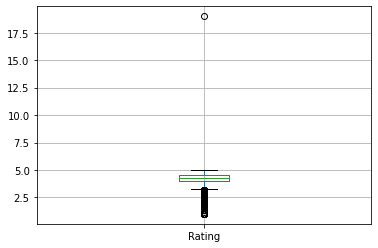

In [ ]:
#Plotting a boxplot of Dataframe
df_play_store_data.boxplot()

In the above boxplot we got outliers so first we have to check and remove them from ratings column.

# **CHECKING HOW MANY OUTLIERS ARE THERE IN RATINGS COLUMN**

In [ ]:
df_play_store_data[df_play_store_data.Rating>5]#here we have taken less than 5 because ratings are always between 0 to 5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
#Dropping the row using drop function and inplace=True for storing data permanently in our dataframe
df_play_store_data.drop([10472],inplace=True)

In [ ]:
#Checking Dataframe
df_play_store_data[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


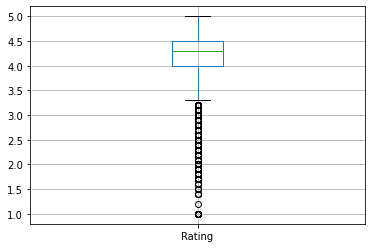

In [ ]:
#Plotting boxplot and checking ratings for any errors
df_play_store_data.boxplot();

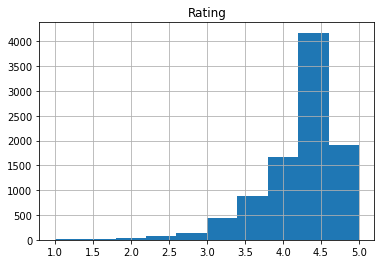

In [ ]:
df_play_store_data.hist();

# **DATA CLEANING**

In [ ]:
#Checking non-null values and Data-types of columns using info function
df_play_store_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [ ]:
#Checking null values in our columns
df_play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

From above we can say that we have some null values in our columns.So we have to do manipulation of data or data-wrangling for better understanding. 

# **DATA MANIPULATION**

In [ ]:
#First printing the mode of each columns which has null values less than 10
print(df_play_store_data['Type'].mode())
print(df_play_store_data['Current Ver'].mode())
print(df_play_store_data['Android Ver'].mode())
print(df_play_store_data['Content Rating'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    Everyone
dtype: object


In [ ]:
#Filling the null values of columns by their mode using fillna function
df_play_store_data['Type'].fillna(str(df_play_store_data['Type'].mode().values[0]),inplace=True)
df_play_store_data['Current Ver'].fillna(str(df_play_store_data['Current Ver'].mode().values[0]),inplace=True)
df_play_store_data['Android Ver'].fillna(str(df_play_store_data['Android Ver'].mode().values[0]),inplace=True)
df_play_store_data['Content Rating'].fillna(str(df_play_store_data['Content Rating'].mode().values[0]),inplace=True)

In [ ]:
#Checking null values in Dataframe
df_play_store_data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

We can see from above there is only ratings column that has null values and all other columns having null values have been filled by their modes.



In [ ]:
def median_value(series):
  return series.fillna(series.median)

In [ ]:
df_play_store_data.Rating=df_play_store_data['Rating'].transform(median_value)

In [ ]:
print(df_play_store_data.isnull().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [ ]:
df_play_store_data['Price']=df_play_store_data['Price'].apply((lambda x: str(x).replace('$','') if '$' in str(x) else str(x)))
df_play_store_data['Price']=df_play_store_data['Price'].apply((lambda x: float(x)))
df_play_store_data['Reviews']=pd.to_numeric(df_play_store_data['Reviews'],errors='coerce')

In [ ]:
df_play_store_data['Installs']=df_play_store_data['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df_play_store_data['Installs']=df_play_store_data['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df_play_store_data['Installs']=df_play_store_data['Installs'].apply(lambda x: float(x))

In [ ]:
df_play_store_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_play_store_data.describe()

,Reviews,Installs,Price
count,1.084000e+04,1.084000e+04,10840.000000
mean,4.441529e+05,1.546434e+07,1.027368
std,2.927761e+06,8.502936e+07,15.949703
min,0.000000e+00,0.000000e+00,0.000000
25%,3.800000e+01,1.000000e+03,0.000000
50%,2.094000e+03,1.000000e+05,0.000000
75%,5.477550e+04,5.000000e+06,0.000000
max,7.815831e+07,1.000000e+09,400.000000


# **DATA VISUALIZATION**

In [ ]:
grp=df_play_store_data.groupby('Category')
m=grp['Installs'].agg(np.mean)
n=grp['Price'].agg(np.sum)
o=grp['Reviews'].agg(np.mean)
print(m)
print(n)
print(o)

Category
ART_AND_DESIGN         1.912894e+06
AUTO_AND_VEHICLES      6.250613e+05
BEAUTY                 5.131519e+05
BOOKS_AND_REFERENCE    8.318050e+06
BUSINESS               2.178076e+06
COMICS                 9.347692e+05
COMMUNICATION          8.435989e+07
DATING                 1.129533e+06
EDUCATION              5.586231e+06
ENTERTAINMENT          1.925611e+07
EVENTS                 2.495806e+05
FAMILY                 5.201959e+06
FINANCE                2.395215e+06
FOOD_AND_DRINK         2.156683e+06
GAME                   3.066960e+07
HEALTH_AND_FITNESS     4.642441e+06
HOUSE_AND_HOME         1.917187e+06
LIBRARIES_AND_DEMO     7.411284e+05
LIFESTYLE              1.407444e+06
MAPS_AND_NAVIGATION    5.286729e+06
MEDICAL                1.150269e+05
NEWS_AND_MAGAZINES     2.648876e+07
PARENTING              5.253518e+05
PERSONALIZATION        5.932385e+06
PHOTOGRAPHY            3.011417e+07
PRODUCTIVITY           3.343418e+07
SHOPPING               1.249173e+07
SOCIAL             

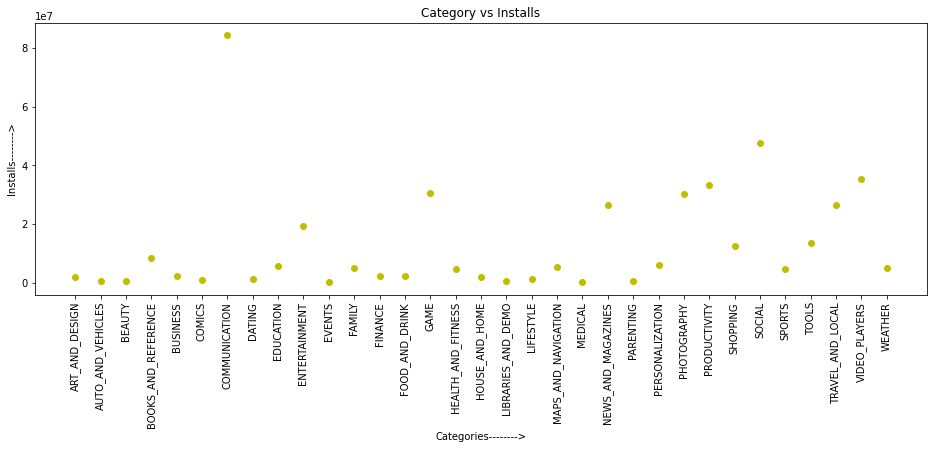

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(m,'ro', color= 'y')
plt.xticks(rotation=90)
plt.title('Category vs Installs')
plt.xlabel('Categories-------->')
plt.ylabel('Installs-------->')
plt.show()

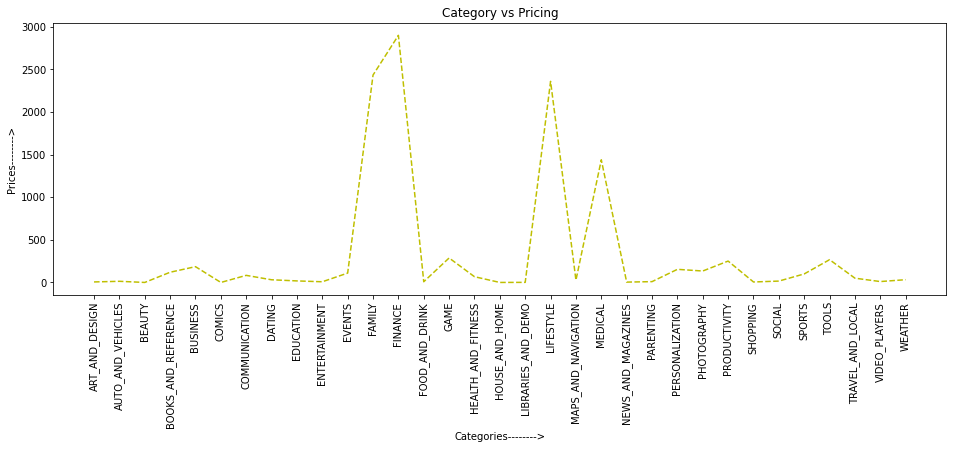

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(n,'r--', color= 'y')
plt.xticks(rotation=90)
plt.title('Category vs Pricing')
plt.xlabel('Categories-------->')
plt.ylabel('Prices-------->')
plt.show()

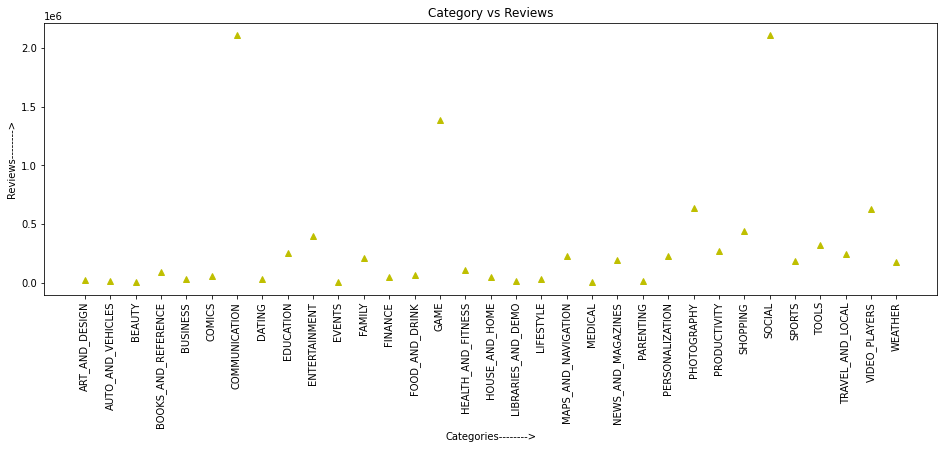

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(o,'g^', color= 'y')
plt.xticks(rotation=90)
plt.title('Category vs Reviews')
plt.xlabel('Categories-------->')
plt.ylabel('Reviews-------->')
plt.show()